In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Read in the unclean dataset
# First dataset comes from https://www.kaggle.com/datasets/fredericksalazar/average-years-of-schooling-since-1870-2017?resource=download
dfPre2017 = pd.read_csv('Unclean Datasets/mean-years-of-schooling-long-run.csv')

# The dataset needs to be delimited by Semicolon
fullColumnName = dfPre2017.columns[0]
newColumns = fullColumnName.split(';')

# Split the entires of the first column
dfPre2017['split'] = dfPre2017[dfPre2017.columns[0]].str.split(pat=';')

# Add the new columns
for i, col in enumerate(newColumns):
    dfPre2017[col] = dfPre2017['split'].str[i]

# Delete the unnecessary columns
del dfPre2017[fullColumnName]
del dfPre2017['split']

# Format the columns
dfPre2017['Entity'] = dfPre2017['Entity'].str.upper()
dfPre2017['Year'] = dfPre2017['Year'].astype(int)
dfPre2017['avg_years_of_schooling'] = dfPre2017['avg_years_of_schooling'].astype(float)
dfPre2017.rename(columns={'Entity': 'Country'}, inplace=True)
dfPre2017

,Country,Code,Year,avg_years_of_schooling
0,AFGHANISTAN,AFG,1870,0.01
1,AFGHANISTAN,AFG,1875,0.01
2,AFGHANISTAN,AFG,1880,0.01
3,AFGHANISTAN,AFG,1885,0.01
4,AFGHANISTAN,AFG,1890,0.01
...,...,...,...,...
7758,ZIMBABWE,ZWE,2013,8.00
7759,ZIMBABWE,ZWE,2014,8.20
7760,ZIMBABWE,ZWE,2015,8.20
7761,ZIMBABWE,ZWE,2016,8.20


In [33]:
dfPost2017 = pd.read_csv("Unclean Datasets/mean-years-schooling-after-2017.csv") # Contains median data
# Second dataset: comes from https://globaldatalab.org/shdi/table/msch/
listToDelete = ['Level', 'GDLCODE', 'Region', 'Continent']
for col in listToDelete:
    del dfPost2017[col]

dfPost2017['Country'] = dfPost2017['Country'].str.upper()
# The problem is the two datasets have different numbers. But they do seem to be monotonic transformations kinda.
yearList = np.arange(1990, 2022)
yearList = [str(year) for year in yearList]
# Reshape the dataframe to contain Country-Year observations
dfPost2017 = pd.melt(dfPost2017,id_vars='Country', value_vars=yearList, var_name="Year", value_name="avg_years_of_schooling")

# Format the columns
dfPost2017["Year"] = dfPost2017["Year"].astype(int)
dfPost2017["avg_years_of_schooling"] = dfPost2017["avg_years_of_schooling"].astype(float)

dfPost2017

,Country,Year,avg_years_of_schooling
0,AFGHANISTAN,1990,0.971
1,ALBANIA,1990,7.355
2,ALGERIA,1990,4.615
3,ANDORRA,1990,NaN
4,ANGOLA,1990,NaN
...,...,...,...
5979,VENEZUELA,2021,11.110
5980,VIETNAM,2021,8.370
5981,YEMEN,2021,3.200
5982,ZAMBIA,2021,7.187


In [34]:
# Save both dataset
dfPre2017.to_csv('Cleaned Datasets/CleanedEducationData1870_2017.csv', index=False)
dfPost2017.to_csv('Cleaned Datasets/CleanedEducationData1990_2021.csv', index=False)

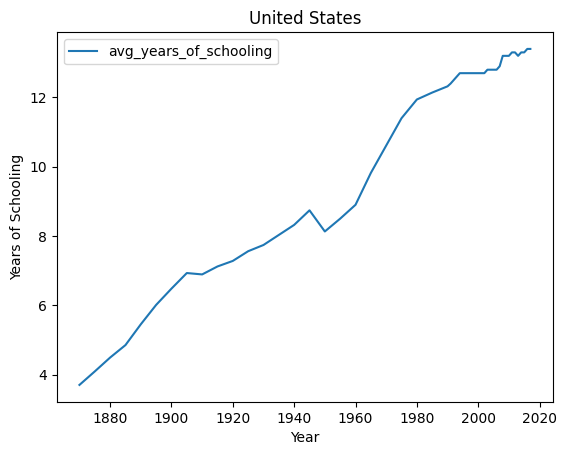

In [38]:
# Plot average years of schooling for the US
usYearsSchooling = dfPre2017[dfPre2017["Country"] == "UNITED STATES"]
usYearsSchooling.plot(x='Year', y='avg_years_of_schooling')
plt.title("United States")
plt.ylabel("Years of Schooling")
plt.show()